In [4]:
import pandas as pd
file_path=r'C:\Users\Kavya\Documents\Training.csv'
df = pd.read_csv(file_path)
df.replace('?', 0, inplace=True)
df.to_csv('Training_cleaned.csv', index=False)
print(df.head())


C:\Users\Kavya\AppData\Local\Temp\ipykernel_24252\1802709659.py:5: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Kavya\AppData\Local\Temp\ipykernel_24252\1802709659.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', 0, inplace=True)


   0  ?  0.000000000  1393661302.645757000  0.000000000.1  0.000000000.2  \
0  0  0          0.0          1.393661e+09       0.024271       0.024271   
1  0  0          0.0          1.393661e+09       0.001631       0.001631   
2  0  0          0.0          1.393661e+09       0.055325       0.055325   
3  0  0          0.0          1.393661e+09       0.000415       0.000415   
4  0  0          0.0          1.393661e+09       0.000005       0.000005   

   0.000000000.3  261  261.1  0.1  ...  ?.40  ?.41  ?.42  ?.43  ?.44  ?.45  \
0       0.024271  185    185    0  ...     0     0     0     0     0     0   
1       0.025902  185    185    0  ...     0     0     0     0     0     0   
2       0.081227  159    159    0  ...     0     0     0     0     0     0   
3       0.081642   54     54    0  ...     0     0     0     0     0     0   
4       0.081647   40     40    0  ...     0     0     0     0     0     0   

   ?.46  ?.47  ?.48  normal  
0     0     0     0  normal  
1     0     0 

In [2]:
import os
print(os.getcwd())


C:\Users\Kavya\Documents


In [5]:
a=df.shape[0]
print(a)

1795574


In [6]:

count = df.apply(lambda col: (col == '?').sum())
print(count)


0                       0
?                       0
0.000000000             0
1393661302.645757000    0
0.000000000.1           0
                       ..
?.45                    0
?.46                    0
?.47                    0
?.48                    0
normal                  0
Length: 155, dtype: int64


In [7]:

mark = df.isin(['?']).any().any()
print(f"'?' in the DataFrame {mark}")


Are there any '?' in the DataFrame? False


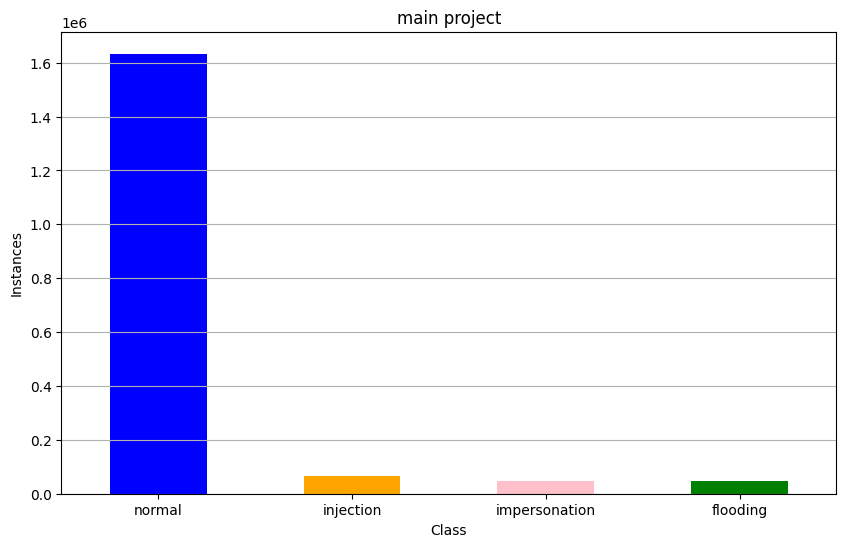

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


classcounts = df.iloc[:, -1].value_counts()  

plt.figure(figsize=(10, 6))
classcounts.plot(kind='bar', color=['blue', 'orange','pink','green'])  
plt.title('main project')
plt.xlabel('Class')
plt.ylabel('Instances')
plt.xticks(rotation=0)  
plt.grid(axis='y')


plt.show()


In [23]:
normalinstances = df[df.iloc[:, -1] == 'normal']  
attackinstances = df[df.iloc[:, -1] != 'normal']

normalsampled = normalinstances.sample(n=163319, random_state=42)  

balanceddf = pd.concat([normalsampled, attackinstances])

balanceddf = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

balanceddf.to_csv('Training_balanced.csv', index=False)

classcounts = balanceddf.iloc[:, -1].value_counts()
print(classcounts)

ValueError: a must be greater than 0 unless no samples are taken

In [24]:
import pandas as pd
balancedfilepath = r'C:\Users\Kavya\Documents\Training_balanced.csv'
balanceddf = pd.read_csv(balancedfilepath, low_memory=False)
def hex_to_int(x):
    if isinstance(x, str) and all(c in '0123456789abcdefABCDEF' for c in x.strip('0x')):
        try:
            return int(x, 16)  
        except ValueError:
            return x  
    else:
        return x  
hexcolumns = balanceddf.select_dtypes(include=['object']).columns
for col in hexcolumns:
    balanceddf[col] = balanceddf[col].apply(hex_to_int)
balanceddf.to_csv('Training_balanced_hex_converted.csv', index=False)
print(balanceddf.head())


   0  ?  0.000000000  1393661302.645757000  0.000000000.1  0.000000000.2  \
0  0  0          0.0          1.393664e+09       0.002038       0.002038   
1  0  0          0.0          1.393663e+09       0.001106       0.001106   
2  0  0          0.0          1.393665e+09       0.000845       0.000845   
3  0  0          0.0          1.393664e+09       0.000908       0.000908   
4  0  0          0.0          1.393663e+09       0.000583       0.000583   

   0.000000000.3   261  261.1  0.1  ...  ?.40  ?.41  ?.42  ?.43  ?.44  ?.45  \
0    2290.327193    98     98    0  ...     0     0     0     0     0     0   
1    1446.545525    98     98    0  ...     0     0     0     0     0     0   
2    3528.771696  1554   1554    0  ...     1     0     0     0     0     0   
3    2221.887398    98     98    0  ...     0     0     0     0     0     0   
4    2152.464984   124    124    0  ...     0     0     0     0     0     0   

   ?.46  ?.47  ?.48         normal  
0     0     0    36  impersonat

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
convertedfilepath = 'Training_balanced_hex_converted.csv'
df = pd.read_csv(convertedfilepath)
numericcolumns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numericcolumns] = scaler.fit_transform(df[numericcolumns])
df.to_csv('Training_balanced_normalized.csv', index=False)
print(df.head())


C:\Users\Kavya\AppData\Local\Temp\ipykernel_20336\80657108.py:4: DtypeWarning: Columns (87,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(convertedfilepath)


     0    ?  0.000000000  1393661302.645757000  0.000000000.1  0.000000000.2  \
0  0.0  0.0          0.0              0.636261       0.006271       0.006271   
1  0.0  0.0          0.0              0.401824       0.003402       0.003402   
2  0.0  0.0          0.0              0.980352       0.002598       0.002598   
3  0.0  0.0          0.0              0.617246       0.002792       0.002792   
4  0.0  0.0          0.0              0.597957       0.001792       0.001792   

   0.000000000.3       261     261.1  0.1  ...      ?.40  ?.41  ?.42  ?.43  \
0       0.636261  0.037908  0.037908  0.0  ...  0.000000   0.0   0.0   0.0   
1       0.401824  0.037908  0.037908  0.0  ...  0.000000   0.0   0.0   0.0   
2       0.980352  0.989542  0.989542  0.0  ...  0.166667   0.0   0.0   0.0   
3       0.617246  0.037908  0.037908  0.0  ...  0.000000   0.0   0.0   0.0   
4       0.597957  0.054902  0.054902  0.0  ...  0.000000   0.0   0.0   0.0   

   ?.44  ?.45  ?.46  ?.47      ?.48         normal

In [28]:
import pandas as pd
file_path=r'C:\Users\Kavya\Documents\Training_balanced_normalized.csv'

df = pd.read_csv(file_path)
columns = [f'attr_{i}' for i in range(1, 155)] + ['class']
df.columns = columns

normal_instances = df[df['class'] == 'normal']
attack_instances = df[df['class'] != 'normal']  
normal_sample = normal_instances.sample(n=4000, random_state=46)
attack_sample = attack_instances.sample(n=6000, random_state=46)
subset = pd.concat([normal_sample, attack_sample])
subset.to_csv('subset3_10000.csv', index=False)

print("Subset created with 10,000 instances: 4,000 normal and 6,000 attack.")


C:\Users\Kavya\AppData\Local\Temp\ipykernel_20336\2260459293.py:4: DtypeWarning: Columns (87,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Subset created with 10,000 instances: 4,000 normal and 6,000 attack.


In [29]:
df.dtypes

attr_1      float64
attr_2      float64
attr_3      float64
attr_4      float64
attr_5      float64
             ...   
attr_151    float64
attr_152    float64
attr_153    float64
attr_154    float64
class        object
Length: 155, dtype: object

In [30]:
mapping = {'normal' : 0, 'injection': 1, 'flooding' : 2, 'impersonation': 3}
df['class'] = df['class'].map(mapping)

In [47]:
df.dtypes[df.dtypes != np.float64]

class    int64
dtype: object

In [39]:
import numpy as np

In [43]:
df.astype({'attr_119':'float64'})

ValueError: could not convert string to float: 'OTE29224e': Error while type casting for column 'attr_119'

In [41]:

# Step 1: Convert to numeric, forcing non-convertible values to NaN
df['attr_88'] = pd.to_numeric(df['attr_88'], errors='coerce')

# Step 2: Calculate the average of the valid values
average_value = df['attr_88'].mean()

# Step 3: Replace NaN values with the average
df['attr_88'].fillna(average_value, inplace=True)

# If you want to ensure the column is of type float
df['attr_88'] = df['attr_88'].astype('float64')

# Check the result
print(df)


        attr_1  attr_2  attr_3    attr_4    attr_5    attr_6    attr_7  \
0          0.0     0.0     0.0  0.636261  0.006271  0.006271  0.636261   
1          0.0     0.0     0.0  0.401824  0.003402  0.003402  0.401824   
2          0.0     0.0     0.0  0.980352  0.002598  0.002598  0.980352   
3          0.0     0.0     0.0  0.617246  0.002792  0.002792  0.617246   
4          0.0     0.0     0.0  0.597957  0.001792  0.001792  0.597957   
...        ...     ...     ...       ...       ...       ...       ...   
325699     0.0     0.0     0.0  0.735276  0.012707  0.012707  0.735276   
325700     0.0     0.0     0.0  0.654874  0.006680  0.006680  0.654874   
325701     0.0     0.0     0.0  0.547204  0.001302  0.001302  0.547204   
325702     0.0     0.0     0.0  0.512545  0.001444  0.001444  0.512545   
325703     0.0     0.0     0.0  0.986082  0.002881  0.002881  0.986082   

          attr_8    attr_9  attr_10  ...  attr_146  attr_147  attr_148  \
0       0.037908  0.037908      0.0  

C:\Users\Kavya\AppData\Local\Temp\ipykernel_20336\957205619.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['attr_88'].fillna(average_value, inplace=True)


In [37]:
cols_to_drop = [f'attr_{i}' for i in range(76,81)]
df.drop(columns = cols_to_drop, inplace = True)

In [45]:
len(df['attr_119'].unique())

3371

In [46]:
cols_to_drop = ['attr_119']
df.drop(columns = cols_to_drop, inplace = True)

In [48]:
df.to_csv('Training_balanced_normalized_preprocessed.csv', index=False)
print(df.head())

   attr_1  attr_2  attr_3    attr_4    attr_5    attr_6    attr_7    attr_8  \
0     0.0     0.0     0.0  0.636261  0.006271  0.006271  0.636261  0.037908   
1     0.0     0.0     0.0  0.401824  0.003402  0.003402  0.401824  0.037908   
2     0.0     0.0     0.0  0.980352  0.002598  0.002598  0.980352  0.989542   
3     0.0     0.0     0.0  0.617246  0.002792  0.002792  0.617246  0.037908   
4     0.0     0.0     0.0  0.597957  0.001792  0.001792  0.597957  0.054902   

     attr_9  attr_10  ...  attr_146  attr_147  attr_148  attr_149  attr_150  \
0  0.037908      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
1  0.037908      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
2  0.989542      0.0  ...  0.166667       0.0       0.0       0.0       0.0   
3  0.037908      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
4  0.054902      0.0  ...  0.000000       0.0       0.0       0.0       0.0   

   attr_151  attr_152  attr_153  attr_154  class  

In [49]:
df.shape

(325704, 149)

In [ ]:
# import pandas as pd
# file_path=r'C:\Users\Kavya\Documents\Training_balanced_normalized.csv'

# df = pd.read_csv(file_path)
# columns = [f'attr_{i}' for i in range(1, 155)] + ['class']
# df.columns = columns

normal_instances = df[df['class'] == 0]
attack_instances = df[df['class'] != 0]  
normal_sample = normal_instances.sample(n=4000, random_state=44)
attack_sample = attack_instances.sample(n=6000, random_state=44)
subset = pd.concat([normal_sample, attack_sample])
subset.to_csv('Preprocessed_set3_10000.csv', index=False)

print("Subset created with 10,000 instances: 4,000 normal and 6,000 attack.")
